# Exploring and Visualizing the Data

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [143]:
pd.DataFrame.iteritems = pd.DataFrame.items

In [144]:
#Import the new refined dataset
data_src = "Datasets/music_refined.csv"
df = pd.read_csv(data_src)
df.set_index("Index", inplace = True)

In [145]:
df.head(3)

,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Stream
Index,,,,,,,,,,,,,,,,,,
0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,-6.679,0.1770,0.00836,0.002330,0.6130,0.772,138.559,222640.0,1.040235e+09
1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,-5.815,0.0302,0.08690,0.000687,0.0463,0.852,92.761,200173.0,3.100837e+08
2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,-3.930,0.0522,0.04250,0.046900,0.1160,0.551,108.014,215150.0,6.306347e+07


## Understanding Auditory Features

To begin exploring the data, lets understand how these auditory features are distributed and how they relate to eachother.

In [141]:
#IMPORTANT: I will establish what the auditory features are now so that we do not have to keep subsetting this list later
audio_features = [
    "Danceability", "Energy", "Key", "Loudness", "Speechiness", "Acousticness", "Instrumentalness", "Liveness", "Valence", "Tempo"
]

### Plotting the Distributions

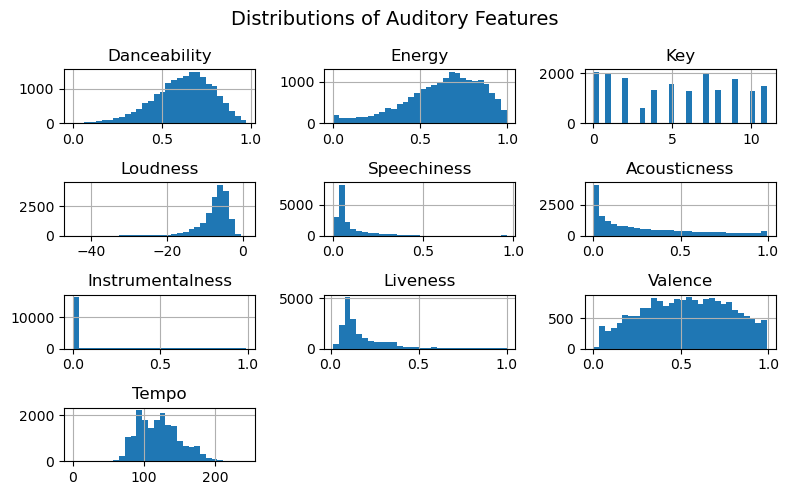

In [146]:
df[audio_features].hist(
    bins=30,
    figsize=(8, 5),
    layout=(4, 3)
)

plt.suptitle("Distributions of Auditory Features", fontsize=14)
plt.tight_layout()
plt.show()

### Understanding statistical features

In [147]:
df[audio_features].describe()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
count,18433.000000,18433.000000,18433.000000,18433.000000,18433.000000,18433.000000,18433.000000,18433.000000,18433.000000,18433.000000
mean,0.619973,0.634282,5.297184,-7.629490,0.094271,0.290202,0.054117,0.191732,0.531388,120.908847
std,0.163280,0.214364,3.573980,4.539271,0.107409,0.287443,0.189006,0.165831,0.245314,29.511592
min,0.000000,0.001440,0.000000,-44.761000,0.000000,0.000002,0.000000,0.014500,0.000000,0.000000
25%,0.517000,0.504000,2.000000,-8.837000,0.035400,0.042700,0.000000,0.094000,0.340000,97.013000
50%,0.636000,0.665000,5.000000,-6.536000,0.049900,0.189000,0.000003,0.124000,0.538000,119.982000
75%,0.740000,0.799000,8.000000,-4.938000,0.102000,0.478000,0.000462,0.235000,0.729000,139.988000
max,0.975000,0.998000,11.000000,0.920000,0.964000,0.996000,0.992000,1.000000,0.993000,243.372000


### Correlation between these features

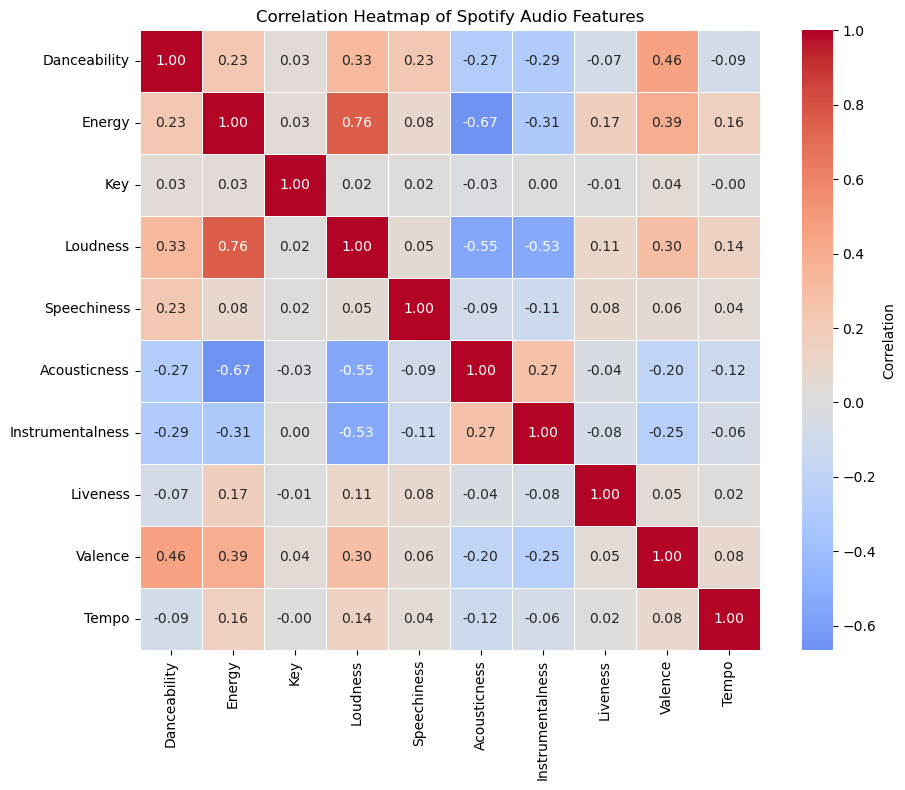

In [148]:
corr = df[audio_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    center=0,
    square=True,
    fmt=".2f",
    linewidths=0.7,
    cbar_kws={"label": "Correlation"}
)

plt.title("Correlation Heatmap of Spotify Audio Features")
plt.tight_layout()
plt.show()

## Points of Interest: The 3 Key Features

From this correlation heatmap we can see that there are three auditory features that have the strongest correlations with eachother, whether that be positive or negative:
- **Energy and Loudness** have a positive correlation of **0.76.**
- **Acousticness and Energy** have a negative correlation of **-0.67.**
- **Acousticness and Loudnes** have a negative correlation of **-0.55.**

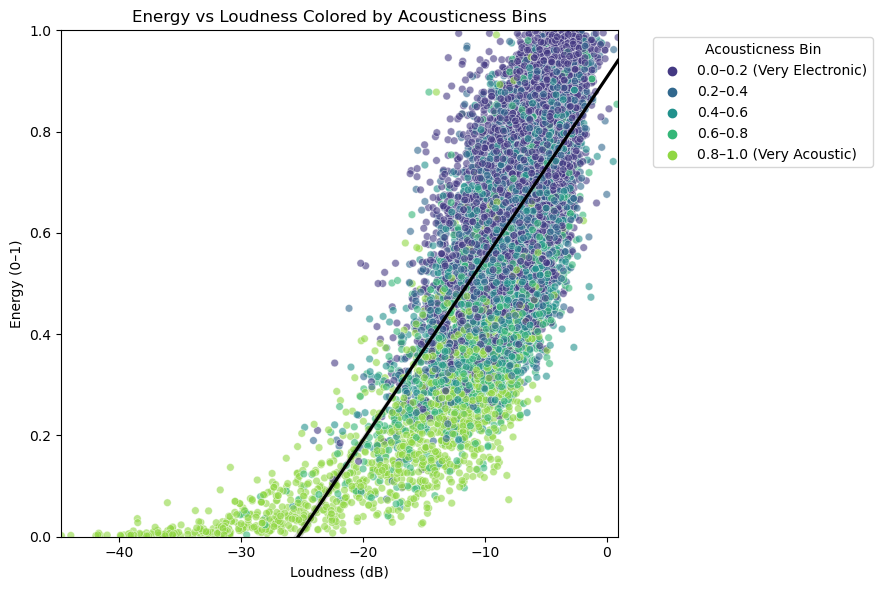

In [149]:
#Lets plot how the three of these features relate with a scatter and line plot

bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = [
    "0.0–0.2 (Very Electronic)",
    "0.2–0.4",
    "0.4–0.6",
    "0.6–0.8",
    "0.8–1.0 (Very Acoustic)"
]

df["Acoustic_Bin"] = pd.cut(
    df["Acousticness"],
    bins=bins,
    labels=labels,
    include_lowest=True)

plt.figure(figsize=(9, 6))

sns.scatterplot(
    data=df,
    x="Loudness",
    y="Energy",
    hue="Acoustic_Bin",
    palette="viridis",
    alpha=0.6,
    s=30)

sns.regplot(
    data=df,
    x="Loudness",
    y="Energy",
    scatter=False,
    color="black")

plt.ylim(0, 1)
plt.xlim(df["Loudness"].min(), df["Loudness"].max())

plt.title("Energy vs Loudness Colored by Acousticness Bins")
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy (0–1)")
plt.legend(title="Acousticness Bin", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

We can get a general sense of the relationship between these 3 variables here. However, the distribution of acousticness is widely spread; this feature is measured as a confidence interval on whether or not the track is acoustic. Therefore, values in the middle of the range may be ambiguous, or a complete mix of acoustic and electric sounds. Therefore, I believe it would be much more insigthful to stratify the acousticness feature into two different categories:
- **Pure Acoustic Songs** (Confidence Measure of 0.9 or above, ensuring high confidence that the song is purely acoustic)
- **Pure Electronic Songs** (Confidence measure of 0.1 or below, ensuring high unlikeliness of acousticness, and primarily electronic or highly processed sounds)

### Analysis: Purely Acoustic vs Purely Electronic

In [150]:
#IMPORTANT: Create a mask for Purely Acoustic vs Purely Electronic that we can use throughout the notebook
df["Acoustic_Zone"] = np.where(
    df["Acousticness"] >= 0.9, "Pure Acoustic",
    np.where(df["Acousticness"] <= 0.1, "Pure Electronic", "Neutral")
)

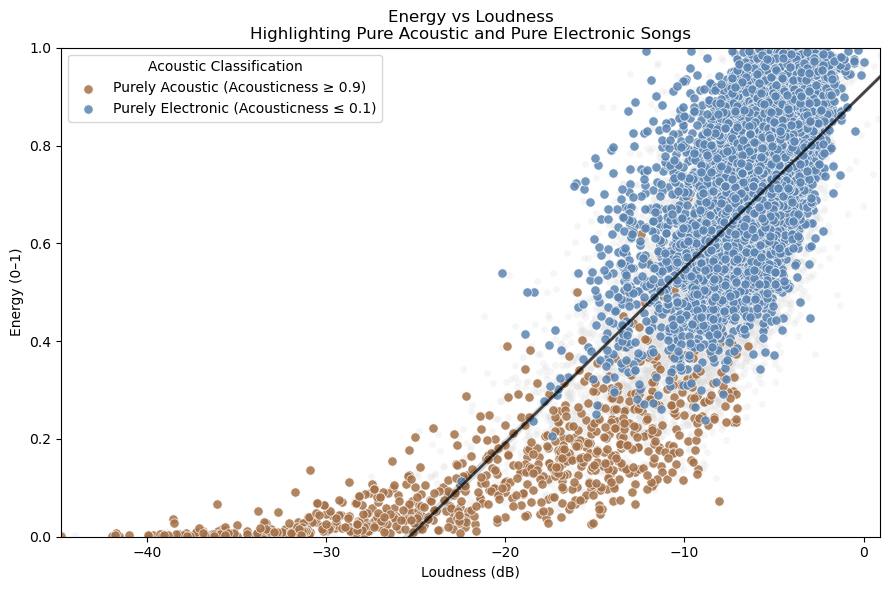

In [151]:
#Recreate the scatterplot, this time with distinct "song type" categories
palette = {
    "Pure Electronic": "#5B84B1FF",  # electric blue/gray
    "Pure Acoustic": "#A47148"       # warm brown/tan
}

plt.figure(figsize=(9, 6))

#Plot neutrals first
sns.scatterplot(
    data=df[df["Acoustic_Zone"] == "Neutral"],
    x="Loudness",
    y="Energy",
    color="lightgray",
    alpha=0.20,
    s=25
)


# Then highlight the pure acoustic and electric songs
sns.scatterplot(
    data=df[df["Acoustic_Zone"] == "Pure Acoustic"],
    x="Loudness",
    y="Energy",
    color=palette["Pure Acoustic"],
    s=45,
    alpha=0.85,
    label="Purely Acoustic (Acousticness ≥ 0.9)"
)
sns.scatterplot(
    data=df[df["Acoustic_Zone"] == "Pure Electronic"],
    x="Loudness",
    y="Energy",
    color=palette["Pure Electronic"],
    s=45,
    alpha=0.85,
    label="Purely Electronic (Acousticness ≤ 0.1)"
)


# Trend line 
sns.regplot(
    data=df,
    x="Loudness",
    y="Energy",
    scatter=False,
    color="black",
    line_kws={"linewidth": 2, "alpha": 0.7}
)


plt.ylim(0, 1)
plt.xlim(df["Loudness"].min(), df["Loudness"].max())
plt.title("Energy vs Loudness\nHighlighting Pure Acoustic and Pure Electronic Songs")
plt.xlabel("Loudness (dB)")
plt.ylabel("Energy (0–1)")
plt.legend(title="Acoustic Classification", loc="upper left", frameon=True)
plt.tight_layout()
plt.show()

#### Energy Outliers

Now that there is a clear image of how pure acoustic songs compare in energy and loudness to pure electric songs, I want to get a closer look at the outliers in each group! I feel like this would deliver insight into unique kinds of songs. 
For each group, I will idenitfy songs with unusually high or low energy levels using the **IQR outlier rule**, highlighting tracks that stand out from the typical energy pattern of their category.

This then creates two types of outliers:
- **Acoustic outliers**: Songs in the purely acoustic category that have significantly more energy than most acoustic songs
- **Electric outliers:** Songs in the purely electric category that have significantly less energy than most electric songs

In [152]:
# Group definitions
pure_acoustic_songs = df[df["Acoustic_Zone"] == "Pure Acoustic"]
pure_electronic_songs = df[df["Acoustic_Zone"] == "Pure Electronic"]

def energy_outliers_iqr(group_df, cols=None, top_n=None):
    """
    Find Energy outliers using IQR. If top_n is given, returns the top_n most extreme
    outliers using distance from the IQR bounds.
    """
    if cols is None:
        cols = ["Artist", "Track", "Energy", "Acousticness", "Stream", "Loudness"]

    Q1 = group_df["Energy"].quantile(0.25)
    Q3 = group_df["Energy"].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_df = group_df.loc[
        (group_df["Energy"] < lower) | (group_df["Energy"] > upper),
        [c for c in cols if c in group_df.columns]
    ].copy()

    # If you want the "most extreme" outliers
    if top_n is not None and len(outlier_df) > 0:
        outlier_df["Energy_Outlier_Score"] = np.where(
            outlier_df["Energy"] > upper,
            outlier_df["Energy"] - upper,
            lower - outlier_df["Energy"]
        )
        outlier_df = outlier_df.sort_values("Energy_Outlier_Score", ascending=False).head(top_n)

    return outlier_df, lower, upper


#Acoustic Outliers
acoustic_top10, a_lower, a_upper = energy_outliers_iqr(acoustic_data, top_n=10)
print("Acoustic Outliers")
display(acoustic_energy_outliers.head(10))


# Electronic outliers
electronic_energy_outliers, e_lower, e_upper = find_energy_outliers(pure_electronic_songs)
print("\nElectronic Outliers")
display(electronic_energy_outliers.head(10))

Acoustic Outliers


,Artist,Track,Energy,Acousticness,Stream
Index,,,,,
2742,Duster,Topical Solution,0.620,0.900,9009383.0
2870,The Alchemist,6 Five Heartbeats (feat. Vince Staples),0.561,0.901,6424849.0
3279,Royal Philharmonic Orchestra,Tree of Life Suite: Oceano,0.512,0.938,4160652.0
3330,Jamie Foxx,Dearly Beloved (feat. Jamie Foxx),0.619,0.946,4875832.0
3484,K. J. Yesudas,En Iniya Pon Nilave Pon,0.526,0.958,7334520.0
3610,Chuck Berry,Route 66,0.692,0.902,39736188.0
3933,Mohammed Rafi,Chup Gaye Sare Nazare,0.548,0.956,6488364.0
8358,Manu Chao,Bongo Bong,0.545,0.944,134045808.0
19263,Paulo Londra,Me Tiene Mal,0.598,0.913,139503120.0



Electronic Outliers


,Artist,Track,Energy,Acousticness,Stream
Index,,,,,
591,Hans Zimmer,Main Titles (You’ve Been Called Back to Top Gun),0.302,0.04040,20954709.0
627,Bob Marley & The Wailers,Natural Mystic,0.282,0.05030,78846083.0
1274,Bryan Adams,Straight From The Heart,0.237,0.07660,81040633.0
1425,S. P. Balasubrahmanyam,"Kathalikkum Penin Kaikal (From ""Kaadhalan"")",0.205,0.00654,12662889.0
1680,TOTO,I'll Be Over You,0.277,0.06200,136488911.0
2257,Prince,Kiss,0.271,0.01350,320875067.0
2296,Ms. Lauryn Hill,Killing Me Softly With His Song,0.290,0.02790,518080621.0
3201,Miguel Bosé,Te Amaré,0.302,0.06630,59209384.0
4229,Steely Dan,Hey Nineteen,0.301,0.01260,60673641.0


Graphing this outlier data to visualize where these songs stand...

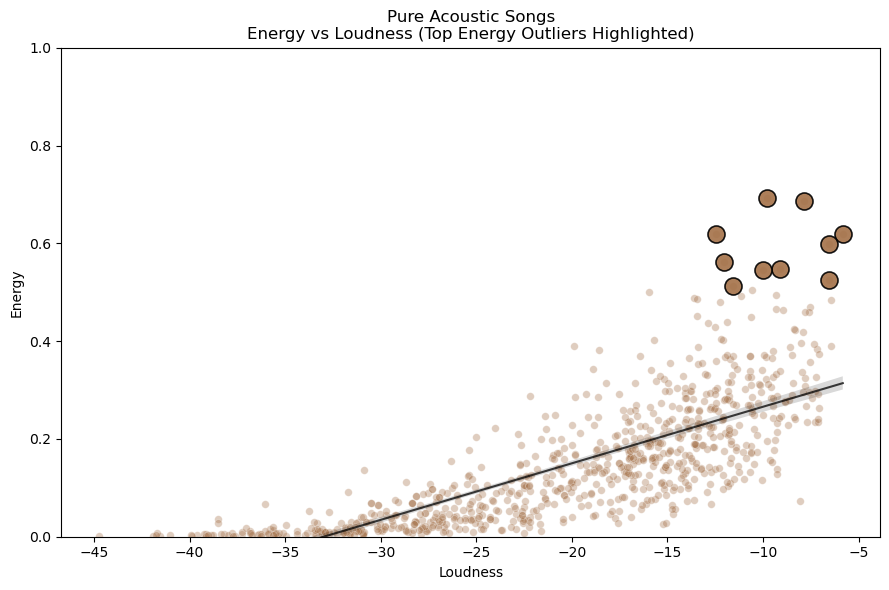

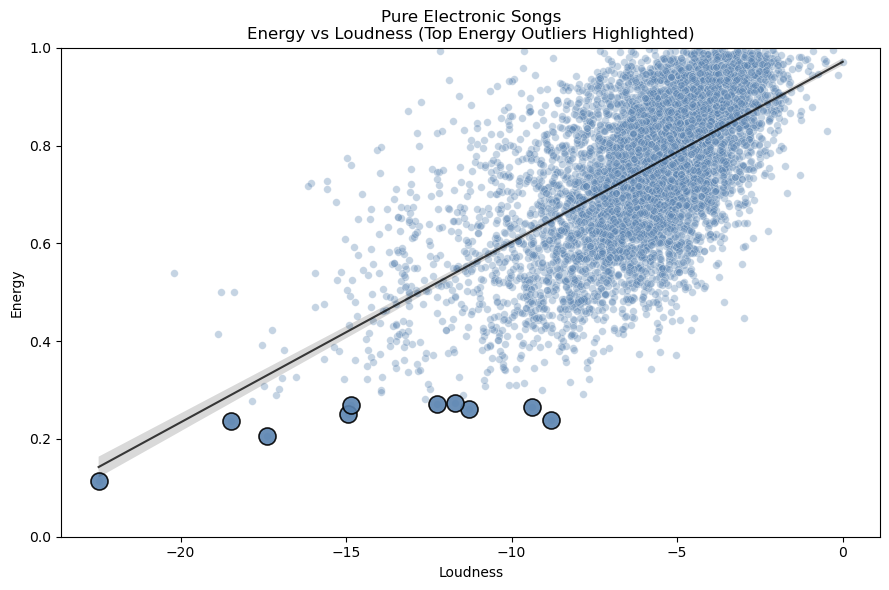

In [153]:
acoustic_data = df[df["Acoustic_Zone"] == "Pure Acoustic"].copy()
electronic_data = df[df["Acoustic_Zone"] == "Pure Electronic"].copy()


def plot_energy_loudness_with_outliers(base_df, outliers_df, color, title):
    plt.figure(figsize=(9, 6))

    # base scatter
    sns.scatterplot(
        data=base_df, x="Loudness", y="Energy",
        color=color, alpha=0.35, s=30
    )

    # highlighted outliers
    sns.scatterplot(
        data=outliers_df, x="Loudness", y="Energy",
        color=color, edgecolor="black", linewidth=1.2,
        alpha=0.9, s=150
    )

    # trend line (for that group only)
    sns.regplot(
        data=base_df, x="Loudness", y="Energy",
        scatter=False, color="black",
        line_kws={"linewidth": 1.5, "alpha": 0.75}
    )

    plt.ylim(0, 1)
    plt.title(title)
    plt.tight_layout()
    plt.show()

palette = {
    "Pure Acoustic": "#A47148",
    "Pure Electronic": "#5B84B1FF"
}

acoustic_data = df[df["Acoustic_Zone"] == "Pure Acoustic"].copy()
electronic_data = df[df["Acoustic_Zone"] == "Pure Electronic"].copy()

# Get top 10 most extreme outliers for each group
acoustic_top10, a_lower, a_upper = energy_outliers_iqr(acoustic_data, top_n=10)
electronic_top10, e_lower, e_upper = energy_outliers_iqr(electronic_data, top_n=10)

# Plot
plot_energy_loudness_with_outliers(
    acoustic_data, acoustic_top10, palette["Pure Acoustic"],
    "Pure Acoustic Songs\nEnergy vs Loudness (Top Energy Outliers Highlighted)"
)

plot_energy_loudness_with_outliers(
    electronic_data, electronic_top10, palette["Pure Electronic"],
    "Pure Electronic Songs\nEnergy vs Loudness (Top Energy Outliers Highlighted)"
)

### Analyzing Popularity of these Songs

We've now found songs that are outliers for their genre. But now, I want to incorporate the feature that measures Spotify streams to analyze how popular these songs actually are. Lets measure the popularity of all acoustic songs and all electric songs compared to their outliers

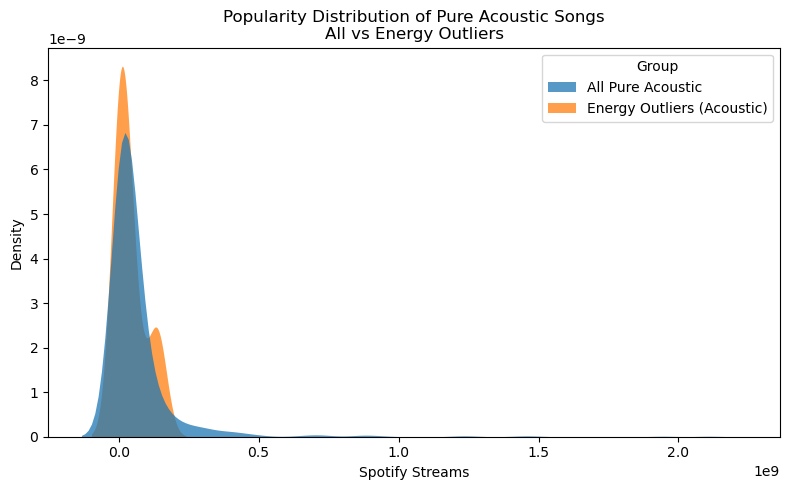

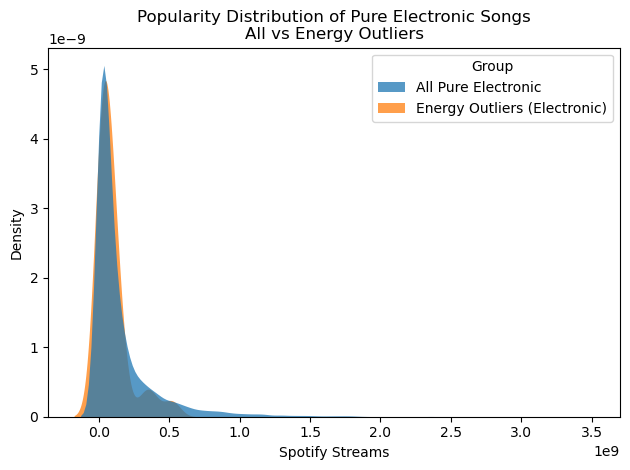

In [154]:
plt.figure(figsize=(8, 5))
#All Acoustic Compared to Acoustic Outliers
sns.kdeplot(
    data=acoustic_plot_df,
    x="Stream",
    hue="Group",
    common_norm=False,
    fill=True,
    alpha=0.75,
    linewidth = 0
)

plt.title("Popularity Distribution of Pure Acoustic Songs\nAll vs Energy Outliers")
plt.xlabel("Spotify Streams")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

#All electronic Compared to Electronic Outliers
sns.kdeplot(
    data=electronic_plot_df,
    x="Stream",
    hue="Group",
    common_norm=False,
    fill=True,
    alpha=0.75,
    linewidth = 0
)

plt.title("Popularity Distribution of Pure Electronic Songs\nAll vs Energy Outliers")
plt.xlabel("Spotify Streams")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

It appears that these distributions are pretty similar. Instead, let's compare these outliers within the artists themselves. How do these outlier songs compare to other songs the artist has made? 

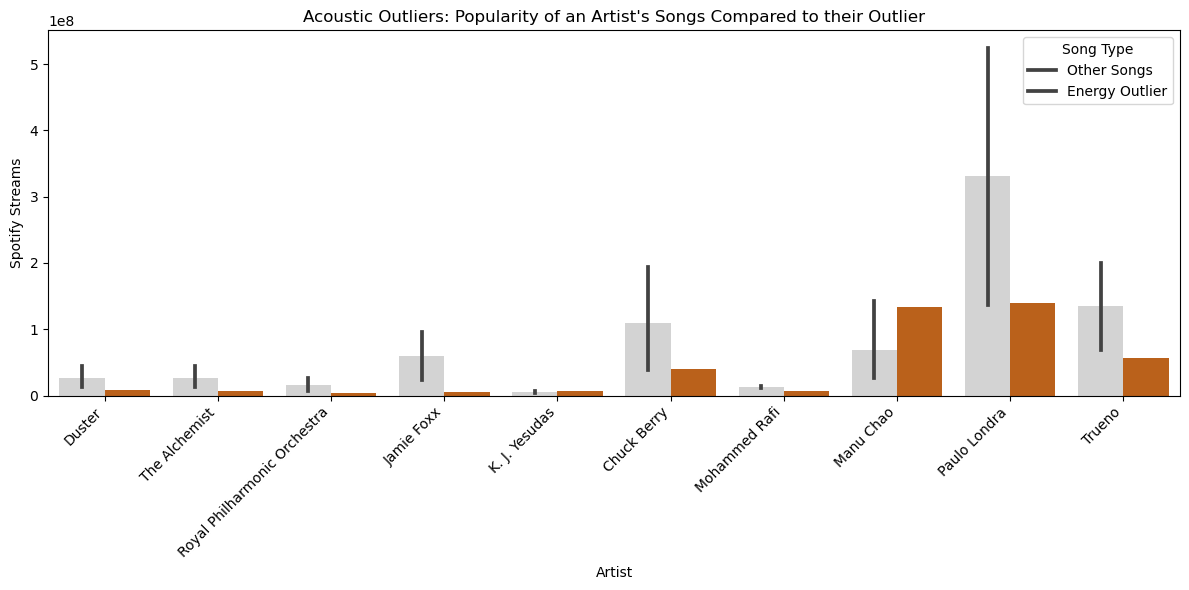

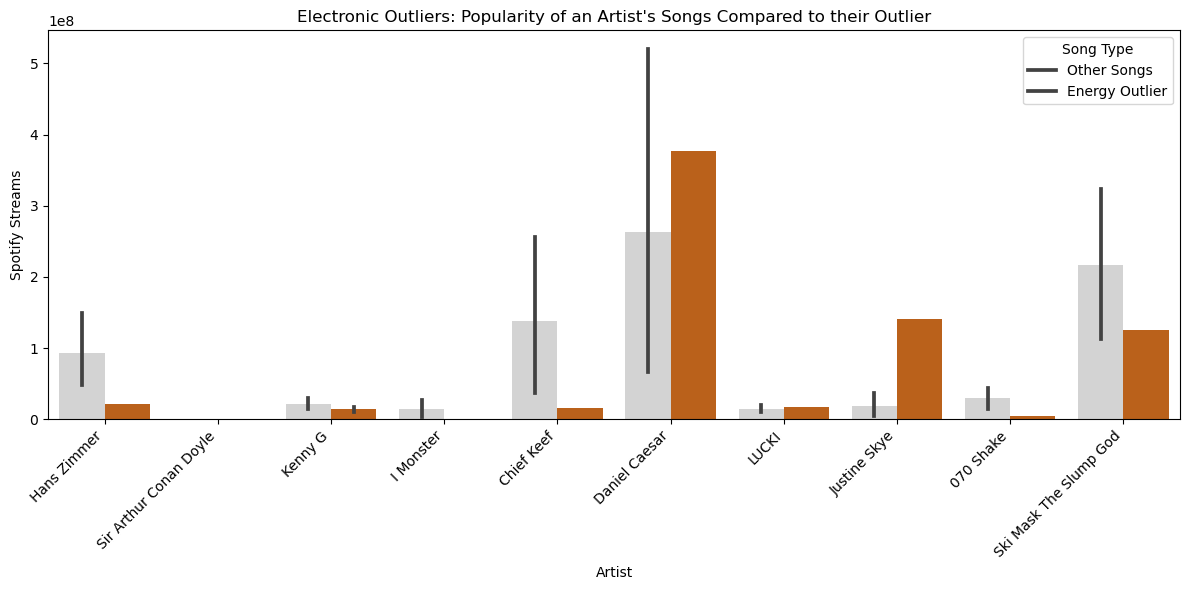

In [155]:
top_acoustic_artists = (
    acoustic_energy_outliers["Artist"]
    .value_counts()
    .head(10)
    .index
)

top_electronic_artists = (
    electronic_energy_outliers["Artist"]
    .value_counts()
    .head(10)
    .index
)

def plot_artist_outlier_comparison(df, outlier_df, artists, title):
    plot_df = df[df["Artist"].isin(artists)].copy()
    plot_df["Outlier"] = plot_df.index.isin(outlier_df.index)

    plt.figure(figsize=(12, 6))

    sns.barplot(
        data=plot_df,
        x="Artist",
        y="Stream",
        hue="Outlier",
        dodge=True,
        palette={False: "lightgray", True: "#D55E00"}
    )

    plt.title(title)
    plt.ylabel("Spotify Streams")
    plt.xlabel("Artist")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Song Type", labels=["Other Songs", "Energy Outlier"])
    plt.tight_layout()
    plt.show()

plot_artist_outlier_comparison(
    df,
    acoustic_energy_outliers,
    top_acoustic_artists,
    "Acoustic Outliers: Popularity of an Artist's Songs Compared to their Outlier"
)

plot_artist_outlier_comparison(
    df,
    electronic_energy_outliers,
    top_electronic_artists,
    "Electronic Outliers: Popularity of an Artist's Songs Compared to their Outlier"
)

### The Final Search: Hidden Gems

It appears that, in general, most of the energy outlier songs have less Spotify streams than other songs by the artist. This gives us interesting insights into truly "unique" music—— songs that are **different from those in their own genre** (more or less energy than their acoustic or electric counterparts), and also are **less mainstream** (not listened to as much than other songs by the same artist). 

To finish off the data exploration, let's find three outlier songs from each category that deviate from the artist's average streams the most... these will be the **"hidden gems": the most unique and least mainstream songs!**

*Note: in must be kept in mind, however, that none of these songs will be very "unpopular" or truly less mainstream because of the nature of the dataset. The creator of this dataset collected the top 10 songs of various spotify artists, so none of these songs will really be that unpopular. That is a limitation of this dataset, but it will still be insightful analysis nonetheless.*

In [156]:
artist_avg_streams = (
    df.groupby("Artist")["Stream"]
    .mean()
    .rename("Artist_Avg_Stream")
)

# Acoustic outliers: deviation from artist average
acoustic_outliers_with_avg["Deviation_Ratio"] = (
    acoustic_outliers_with_avg["Stream"] /
    acoustic_outliers_with_avg["Artist_Avg_Stream"]
)

# Electronic outliers: deviation from artist average
electronic_outliers_with_avg["Deviation_Ratio"] = (
    electronic_outliers_with_avg["Stream"] /
    electronic_outliers_with_avg["Artist_Avg_Stream"]
)

acoustic_below_avg = acoustic_outliers_with_avg[
    acoustic_outliers_with_avg["Deviation_Ratio"] < 1
]


electronic_below_avg = electronic_outliers_with_avg[
    electronic_outliers_with_avg["Deviation_Ratio"] < 1
]

top3_acoustic_underperformers = (
    acoustic_below_avg
    .sort_values("Deviation_Ratio")
    .head(8)
)

top3_electronic_underperformers = (
    electronic_below_avg
    .sort_values("Deviation_Ratio")
    .head(8) )

In [157]:
print("Acoustic Hidden Gems")
display(
    top3_acoustic_underperformers[
        ["Artist", "Track", "Stream", "Artist_Avg_Stream", "Deviation_Ratio", "Energy", "Acousticness"]
    ]
)

print("\nElectric Hidden Gems")
display(
    top3_electronic_underperformers[
        ["Artist", "Track", "Stream", "Artist_Avg_Stream", "Deviation_Ratio", "Energy", "Acousticness"]
    ]
)

Acoustic Hidden Gems


,Artist,Track,Stream,Artist_Avg_Stream,Deviation_Ratio,Energy,Acousticness
3,Jamie Foxx,Dearly Beloved (feat. Jamie Foxx),4875832.0,5.123445e+07,0.095167,0.619,0.946
1,The Alchemist,6 Five Heartbeats (feat. Vince Staples),6424849.0,2.391581e+07,0.268644,0.561,0.901
2,Royal Philharmonic Orchestra,Tree of Life Suite: Oceano,4160652.0,1.414072e+07,0.294232,0.512,0.938
0,Duster,Topical Solution,9009383.0,2.527362e+07,0.356474,0.620,0.900
5,Chuck Berry,Route 66,39736188.0,1.018722e+08,0.390059,0.692,0.902
9,Trueno,Rain,56804199.0,1.261034e+08,0.450457,0.686,0.953
8,Paulo Londra,Me Tiene Mal,139503120.0,3.072122e+08,0.454094,0.598,0.913
6,Mohammed Rafi,Chup Gaye Sare Nazare,6488364.0,1.180712e+07,0.549530,0.548,0.956



Electric Hidden Gems


,Artist,Track,Stream,Artist_Avg_Stream,Deviation_Ratio,Energy,Acousticness
18,I Monster,Sickly Suite Part Three: Gone,557711.0,1.312671e+07,0.042487,0.113,0.075200
24,Chief Keef,Tony Montana Flow,16348379.0,1.239740e+08,0.131869,0.316,0.000032
28,070 Shake,Cocoon,5222389.0,2.650745e+07,0.197016,0.321,0.045100
1,Bob Marley & The Wailers,Natural Mystic,78846083.0,3.889230e+08,0.202729,0.282,0.050300
0,Hans Zimmer,Main Titles (You’ve Been Called Back to Top Gun),20954709.0,8.582559e+07,0.244155,0.302,0.040400
2,Bryan Adams,Straight From The Heart,81040633.0,2.555199e+08,0.317160,0.237,0.076600
13,Kenny G,Sentimental,10934323.0,2.026774e+07,0.539494,0.269,0.034800
4,TOTO,I'll Be Over You,136488911.0,2.487004e+08,0.548808,0.277,0.062000


We can also find the least popular outlier songs in general...

Let's find songs that are **DOUBLE outliers** - in both energy and popularity!

In [158]:
#Understanding this in the context of all spotify stream popularity data
df["Stream"].describe().apply(lambda x: f"{x:,.0f}")

count           18,433
mean       131,962,007
std        236,937,808
min              6,574
25%         17,204,198
50%         48,843,290
75%        134,799,456
max      3,386,520,288
Name: Stream, dtype: object

In [159]:
# Compute IQR for Stream (global popularity)
Q1_stream = df["Stream"].quantile(0.25)
Q3_stream = df["Stream"].quantile(0.75)
IQR_stream = Q3_stream - Q1_stream
stream_lower = Q1_stream  
#NOTE: had to use softer outlier barrier, as no songs show up for typical IQR Rule (*1.5). This is also likely
#because of the way this dataset was created, all artists have their top 10 songs in here

low_popularity_outliers = df[df["Stream"] < stream_lower].copy()

key_cols = ["Artist", "Track", "Energy", "Acousticness", "Stream"]

acoustic_energy_popularity_outliers = acoustic_energy_outliers.merge(
    low_popularity_outliers[key_cols],
    on=key_cols,
    how="inner"
)

electronic_energy_popularity_outliers = electronic_energy_outliers.merge(
    low_popularity_outliers[key_cols],
    on=key_cols,
    how="inner"
)

print("Acoustic Energy AND Low Popularity (<0.25 Percentile) Outliers")
display(
    acoustic_energy_popularity_outliers[
        ["Artist", "Track", "Energy", "Stream", "Acousticness"]
    ].sort_values("Stream")
)

print("\nElectronic Energy AND Low Popularity (<0.25 Percentile) Outliers")
display(
    electronic_energy_popularity_outliers[
        ["Artist", "Track", "Energy", "Stream", "Acousticness"]
    ].sort_values("Stream")
)

Acoustic Energy AND Low Popularity (<0.25 Percentile) Outliers


,Artist,Track,Energy,Stream,Acousticness
2,Royal Philharmonic Orchestra,Tree of Life Suite: Oceano,0.512,4160652.0,0.938
3,Jamie Foxx,Dearly Beloved (feat. Jamie Foxx),0.619,4875832.0,0.946
1,The Alchemist,6 Five Heartbeats (feat. Vince Staples),0.561,6424849.0,0.901
5,Mohammed Rafi,Chup Gaye Sare Nazare,0.548,6488364.0,0.956
4,K. J. Yesudas,En Iniya Pon Nilave Pon,0.526,7334520.0,0.958
0,Duster,Topical Solution,0.620,9009383.0,0.900



Electronic Energy AND Low Popularity (<0.25 Percentile) Outliers


,Artist,Track,Energy,Stream,Acousticness
2,Sir Arthur Conan Doyle,Teil 5 - Sherlock Holmes und der blinde Bettle...,0.323,10306.0,0.090700
1,Sir Arthur Conan Doyle,Teil 10 - Sherlock Holmes und der blinde Bettl...,0.323,11062.0,0.097700
4,I Monster,Sickly Suite Part Three: Gone,0.113,557711.0,0.075200
6,070 Shake,Cocoon,0.321,5222389.0,0.045100
3,Kenny G,Sentimental,0.269,10934323.0,0.034800
0,S. P. Balasubrahmanyam,"Kathalikkum Penin Kaikal (From ""Kaadhalan"")",0.205,12662889.0,0.006540
5,Chief Keef,Tony Montana Flow,0.316,16348379.0,0.000032


**Going forward**: The analysis I've done on auditory features, musical outliers, and popularity can be used to formulate a list on my own type of "unique" music.